In [18]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import math
import statistics
import scipy.stats
pd.set_option('display.max.columns',None)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing # label encoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Pengenalan

Data yang digunakan diunduh di https://www.kaggle.com/selfishgene/historical-hourly-weather-data. Data yang digunakan dalam final asessment ini adalah data cuaca di kota Seattle, Washington, USA. Data ini terdiri dari Pressure, Wind Speed, Wind Direction, Humidity, Temperature, dan Weather Condition. Rentang waktu data yang dipakai mulai dari tahun 1 Oktober 2012 sampai dengan 30 November 2017, dengan waktu per jam.

# Data Loading & EDA

In [19]:
df = pd.read_csv('C:/Users/Nine/Documents/hacktiv8/Final Asessment/seattle_weather.csv')
print ('Data read into a pandas dataframe!')
df

Data read into a pandas dataframe!


,datetime,pressure,ws,wd,humidity,temp,weather
0,10/1/2012 12:00,NaN,NaN,NaN,NaN,NaN,NaN
1,10/1/2012 13:00,1027.0,0.0,0.0,81.0,281.800000,No Precipitation
2,10/1/2012 14:00,1027.0,0.0,2.0,80.0,281.797217,No Precipitation
3,10/1/2012 15:00,1028.0,0.0,10.0,80.0,281.789833,No Precipitation
4,10/1/2012 16:00,1028.0,0.0,17.0,79.0,281.782449,No Precipitation
...,...,...,...,...,...,...,...
45248,11/29/2017 20:00,1030.0,4.0,190.0,93.0,280.820000,Precipitation
45249,11/29/2017 21:00,1030.0,5.0,130.0,87.0,281.650000,No Precipitation
45250,11/29/2017 22:00,1029.0,5.0,210.0,93.0,282.750000,No Precipitation
45251,11/29/2017 23:00,1028.0,3.0,210.0,87.0,282.960000,No Precipitation


In [20]:
# View the top 5 rows of the dataset using the head() function.
df.head()

,datetime,pressure,ws,wd,humidity,temp,weather
0,10/1/2012 12:00,NaN,NaN,NaN,NaN,NaN,NaN
1,10/1/2012 13:00,1027.0,0.0,0.0,81.0,281.800000,No Precipitation
2,10/1/2012 14:00,1027.0,0.0,2.0,80.0,281.797217,No Precipitation
3,10/1/2012 15:00,1028.0,0.0,10.0,80.0,281.789833,No Precipitation
4,10/1/2012 16:00,1028.0,0.0,17.0,79.0,281.782449,No Precipitation


In [21]:
# View the bottom 5 rows of the dataset using the tail() function.
df.tail()

,datetime,pressure,ws,wd,humidity,temp,weather
45248,11/29/2017 20:00,1030.0,4.0,190.0,93.0,280.82,Precipitation
45249,11/29/2017 21:00,1030.0,5.0,130.0,87.0,281.65,No Precipitation
45250,11/29/2017 22:00,1029.0,5.0,210.0,93.0,282.75,No Precipitation
45251,11/29/2017 23:00,1028.0,3.0,210.0,87.0,282.96,No Precipitation
45252,11/30/2017 0:00,1028.0,4.0,100.0,75.0,283.04,No Precipitation


Saat melakukan analisis suatu dataset, akan lebih baik jika pertama kali kita mengetahui basic tentang dataframe kita. Kita dapat melakukannya dengan menggunakan info() method.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  45253 non-null  object 
 1   pressure  45240 non-null  float64
 2   ws        45252 non-null  float64
 3   wd        45252 non-null  float64
 4   humidity  44964 non-null  float64
 5   temp      45250 non-null  float64
 6   weather   45252 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


Jika kita ingin mengetahui atau melihat dimensi dataframe kita, maka kita gunakan .shape parameter.

In [23]:
df.shape

(45253, 7)

In [24]:
# Summary untuk jenis kategori

for i in df[['weather']]:
    print(df[i].value_counts(),'\n')

No Precipitation    33775
Precipitation       11477
Name: weather, dtype: int64 



In [25]:
# Summary data numeric

df.describe()

,pressure,ws,wd,humidity,temp
count,45240.000000,45252.000000,45252.000000,44964.000000,45250.000000
mean,1021.001216,2.118116,161.380226,77.159038,284.409626
std,9.737187,1.629988,103.206816,18.147464,6.547986
min,980.000000,0.000000,0.000000,13.000000,263.780000
25%,1015.000000,1.000000,70.000000,66.000000,279.830000
50%,1020.000000,2.000000,175.000000,81.000000,283.940000
75%,1027.000000,3.000000,218.000000,93.000000,288.530000
max,1058.000000,24.000000,360.000000,100.000000,307.300000


In [26]:
# Check missing data

missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  pressure       ws       wd  humidity      temp  weather
percent missing   0.028727  0.00221  0.00221  0.638632  0.006629  0.00221
how many missing       NaN      NaN      NaN       NaN       NaN      NaN


Text(0.5, 1.0, 'Weather Condition in Seattle')

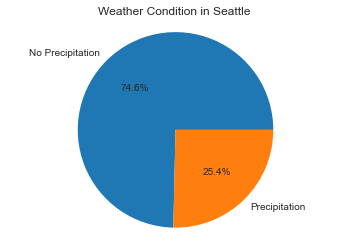

In [27]:
# persentase kondisi cuaca di seattle

df_weath = df['weather'].value_counts()
df_weath.plot(kind='pie',autopct='%1.1f%%',labels=df_weath.index)
plt.axis('equal')
plt.ylabel('')
plt.title('Weather Condition in Seattle')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

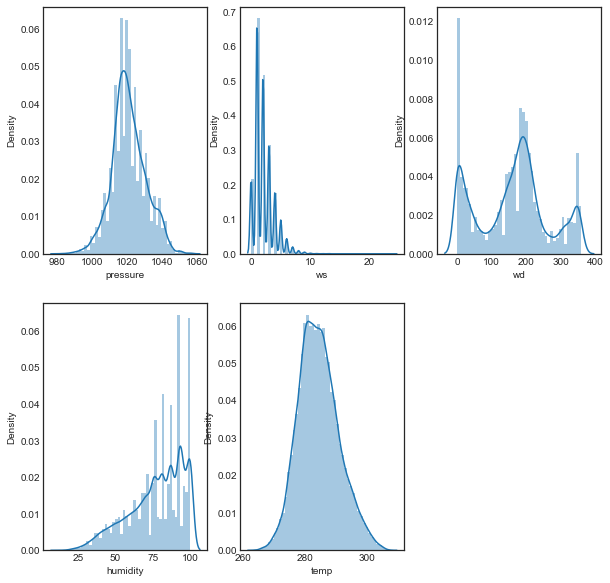

In [28]:
# Distribusi parameter cuaca

plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(df['pressure'].dropna())
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df['ws'].dropna())
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(df['wd'].dropna())
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(df['humidity'].dropna())
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(df['temp'].dropna())
fig = plt.gcf()
fig.set_size_inches(10,10)


# Preprocessing Data

In [29]:
# Hapus NaN

df = df.dropna()

In [30]:
# Mengubah data kategori menjadi numerik
# creating labelEncoder

le = preprocessing.LabelEncoder()

# Convert teks ke numerical kategori

df[['weather']] = df[['weather']].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
df.head()

,datetime,pressure,ws,wd,humidity,temp,weather
1,10/1/2012 13:00,1027.0,0.0,0.0,81.0,281.800000,0
2,10/1/2012 14:00,1027.0,0.0,2.0,80.0,281.797217,0
3,10/1/2012 15:00,1028.0,0.0,10.0,80.0,281.789833,0
4,10/1/2012 16:00,1028.0,0.0,17.0,79.0,281.782449,0
5,10/1/2012 17:00,1029.0,0.0,24.0,79.0,281.775065,0


# Definisi Model

Parameter yang digunakan sebagai features pada use case ini yaitu: pressure, ws, wd, humidity, dan temp.
Parameter yang digunakan sebagai target yaitu weather.

In [42]:
data_feature = df[['pressure', 'ws', 'wd', 'humidity', 'temp']]
data_target   = df[['weather']]

# Split dataset into training set and test set

x_train, x_test, y_train, y_test = train_test_split(data_feature, data_target, test_size=0.3, random_state=0) # 70% training and 30% test
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
print('dimensi feature total: ', data_feature.shape)
print('dimensi feature train: ', x_train.shape)
print('dimensi feature test: ', x_test.shape)
print('dimensi target test: ', y_test.shape)

# Standarisasi data training
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

dimensi feature total:  (44959, 5)
dimensi feature train:  (31471, 5)
dimensi feature test:  (13488, 5)
dimensi target test:  (13488,)


# Learning Model

# Logistic Regression

[0 0 0 ... 0 0 0]
Nilai akurasi pemodelan menggunakan data training adalah 0.761494709415017
Nilai akurasi permodelan menggunakan data testing adalah 0.7585260972716489


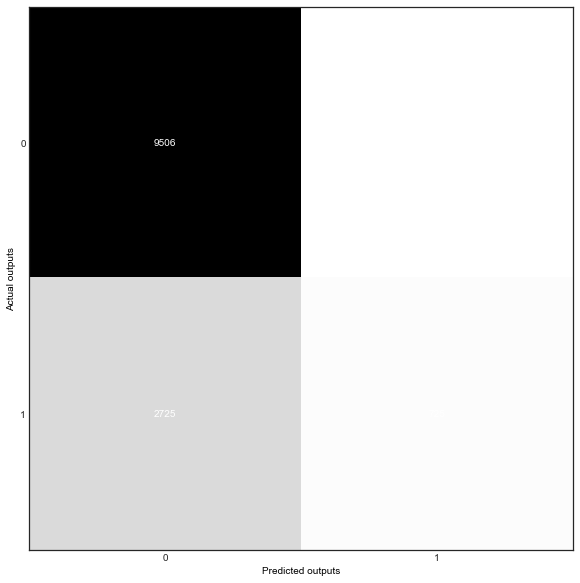

              precision    recall  f1-score   support

           0       0.78      0.95      0.85     10038
           1       0.58      0.21      0.31      3450

    accuracy                           0.76     13488
   macro avg       0.68      0.58      0.58     13488
weighted avg       0.73      0.76      0.71     13488



In [43]:
# Pemodelan
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

# Testing dataset
x_test = scaler.transform(x_test)

# Prediksi output
y_pred = model.predict(x_test)
print(y_pred)
print('Nilai akurasi pemodelan menggunakan data training adalah', model.score(x_train, y_train))
print('Nilai akurasi permodelan menggunakan data testing adalah', model.score(x_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

# Summary model
print(classification_report(y_test, y_pred))

# K-Nearest Neighbor (KNN)

In [44]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

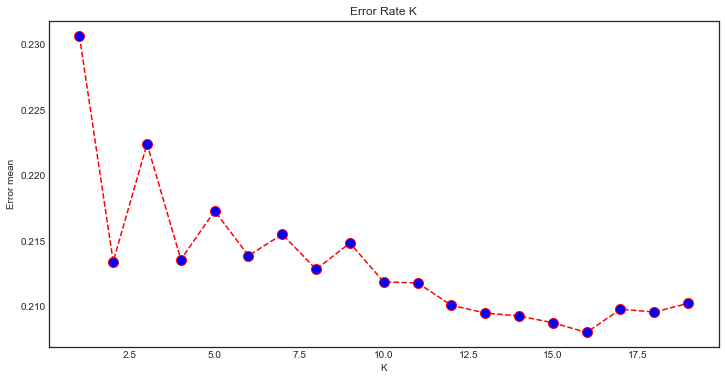

In [45]:
# plotting error rate of K-Means
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [46]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=16)

# Train model using the training sets
knn.fit(x_train, y_train)

# Predict the response for test dataset
y_pred1 = knn.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.7919632265717675


# Naive Bayes Classifier

In [47]:
# Create a Gaussian Naive Bayes Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(x_train, y_train)

# Predict the response for test dataset
y_pred2 = gnb.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.7543742586002372


# Decision Tree Classifier

In [48]:
feature_cols = list(df[df.columns[1:-1]])

# Create Decision Tree classifer object
d_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
d_tree = d_tree.fit(x_train,y_train)

# Predict the response for test dataset
y_pred3 = d_tree.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.7631227758007118


# Random Forest

No handles with labels found to put in legend.


Accuracy: 0.8112396204033214


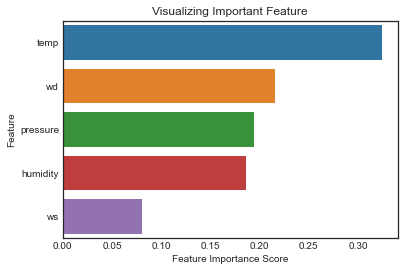

In [49]:
# Create a Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100)
 
# Train the model using the training
forest.fit(x_train,y_train) 

y_pred4 = forest.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

# Finding Important Features
feature_imp = pd.Series(forest.feature_importances_,index=feature_cols).sort_values(ascending=False) 

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title("Visualizing Important Feature")
plt.legend()
plt.show()

# Support Vector Machines

In [50]:
# Create a SVM Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
svm_model.fit(x_train, y_train) 

# Predict the response for test dataset
y_pred5 = svm_model.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.7442170818505338


# Evaluasi Model

In [52]:
print("Logistic Regression:", accuracy_score(y_test, y_pred))
print("KNN:", accuracy_score(y_test, y_pred1))
print("Naive Bayes:", accuracy_score(y_test, y_pred2))
print("Decision Tree:", accuracy_score(y_test, y_pred3))
print("Random Forest:", accuracy_score(y_test, y_pred4))
print("SVM:", accuracy_score(y_test, y_pred5))

Logistic Regression: 0.7585260972716489
KNN: 0.7919632265717675
Naive Bayes: 0.7543742586002372
Decision Tree: 0.7631227758007118
Random Forest: 0.8112396204033214
SVM: 0.7442170818505338


Berdasarkan hasil analisis yang telah dilakukan, dapat diketahui bahwa model yang memiliki tingkat akurasi tertinggi jika dibandingkan dengan model yang lain adalah Random Forest. Sehingga Random Forest dapat dikatakan tepat digunakan dalam memprediksi apakah cuaca akan terjadi precipitation atau tidak berdasarkan parameter pressure, wind speed, wind direction, humidity, dan suhu.

# Model Saving

In [53]:
import pickle
pickle.dump(forest,open('./model_classifier.pkl','wb'))
model = pickle.load(open('./model_classifier.pkl','rb'))

Data Feature yang digunakan untuk case ini adalah:

Pressure (Pa), Wind Speed (Knot), Wind Direction (Degree), Humidity (Percentage),Temperature (Kelvin)

In [63]:
data_input = np.array([950,0,15,93,241]).reshape(1,-1)

print('Dimensi Data Input',data_input.shape)
prediksi = model.predict(data_input)
print('Hasil Prediksi: ', prediksi)
print('Kesimpulan:')
if prediksi == 0:
    print("No Precipitation")
else:
    print("There is Precipitation")

Dimensi Data Input (1, 5)
Hasil Prediksi:  [0]
Kesimpulan:
No Precipitation
